$\Large\textbf{Lab 2. Exercise 1. }$



In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2

In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  nume=np.matmul(gradf.transpose(),gradf)
  deno=np.matmul(np.matmul(gradf.transpose(),A),gradf)
  step_length=nume/(2*deno)  
  return step_length

In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  pk=-gradf
  #implement the backtracking line search
  while evalf(x+alpha*pk)>evalf(x)+gamma*alpha*np.matmul(gradf.T,pk):
    alpha=rho*alpha

  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [7]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, k, evalf(x)


Code for answer 3

In [8]:
my_start_x = np.array([1,1])
my_tol= 1e-5

In [9]:
x_opt_const, iter_const, f_const = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print("Minimizer =", x_opt_const)
print("Minimum function value =", f_const)
print("No of iterations =", iter_const)

Minimizer = [  7.99999775 -11.99999582]
Minimum function value = 2.2517218946096954e-11
No of iterations = 67


In [10]:
x_opt_exact, iter_exact, f_exact = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer =", x_opt_exact)
print("Minimum function value =", f_exact)
print("No of iterations =", iter_exact)

Minimizer = [  8. -12.]
Minimum function value = 0.0
No of iterations = 1


In [11]:
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, iter_bls, f_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Minimizer =", x_opt_bls)
print("Minimum function value =", f_bls)
print("No of iterations =", iter_bls)

Minimizer = [  8. -12.]
Minimum function value = 0.0
No of iterations = 1


Code for answer 4

In [12]:
my_start_x = np.array([25,25])
my_tol= 10**-(12)

In [13]:
x_opt_exact, iter_exact, f_exact = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer =", x_opt_exact)
print("Minimum function value =", f_exact)
print("No of iterations =", iter_exact)

Minimizer = [  8. -12.]
Minimum function value = 0.0
No of iterations = 1


In [14]:
x_opt_bls, iter_bls, f_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print("Minimizer =", x_opt_bls)
print("Minimum function value =", f_bls)
print("No of iterations =", iter_bls)

Minimizer = [  8. -12.]
Minimum function value = 0.0
No of iterations = 1


Code for answer 5

In [15]:
my_start_x = np.array([25,25])
my_tol= 10**-(10)

In [16]:
alpha=[1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter5=[]
print("Alpha \t Minimizer \t Minimum function value \t No of iterations")
for i in alpha:
  x_opt_bls, iter_bls, f_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, 0.5,0.5)
  iter5.append(iter_bls)
  print(i,"\t", x_opt_bls, "\t", f_bls, "\t", iter_bls)

Alpha 	 Minimizer 	 Minimum function value 	 No of iterations
1 	 [  8. -12.] 	 0.0 	 1
0.9 	 [  8. -12.] 	 1.6579714975258972e-21 	 12
0.75 	 [  8. -12.] 	 1.3714654556129199e-21 	 20
0.6 	 [  8. -12.] 	 2.2038291998576117e-21 	 30
0.5 	 [  8. -12.] 	 0.0 	 1
0.4 	 [  8. -12.] 	 1.1393259623274523e-22 	 18
0.25 	 [  8. -12.] 	 1.3714654556129199e-21 	 40
0.1 	 [  8. -12.] 	 2.3972320602008796e-21 	 123
0.01 	 [  8. -12.] 	 2.4523367712209537e-21 	 1358


In [17]:
x_opt_exact, iter_exact, f_exact = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer =",x_opt_exact)
print("Minimum function value =",f_exact)
print("No of iterations =", iter_exact)

Minimizer = [  8. -12.]
Minimum function value = 0.0
No of iterations = 1


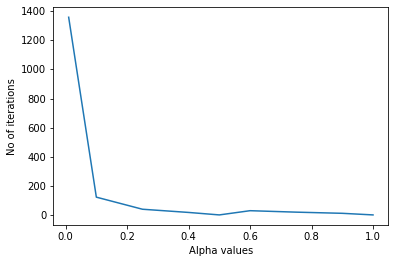

In [18]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(alpha, iter5)
plt.ylabel('No of iterations')
plt.xlabel('Alpha values')
plt.show()

Code for answer 6

In [19]:
my_start_x = np.array([25,25])
my_tol= 10**-(10)

In [20]:
rho=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter6=[]
print("Rho \t Minimizer \t Minimum function value \t No of iterations")
for i in rho:
  x_opt_bls, iter_bls, f_bls = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, i,0.5)
  iter6.append(iter_bls)
  print(i, "\t", x_opt_bls, "\t", f_bls, "\t", iter_bls)

Rho 	 Minimizer 	 Minimum function value 	 No of iterations
0.9 	 [  8. -12.] 	 4.960536411900771e-22 	 9
0.75 	 [  8. -12.] 	 1.0819468296335504e-21 	 15
0.6 	 [  8. -12.] 	 7.844395544174143e-22 	 22
0.5 	 [  8. -12.] 	 0.0 	 1
0.4 	 [  8. -12.] 	 1.1393259623274523e-22 	 18
0.25 	 [  8. -12.] 	 1.3714654556129199e-21 	 40
0.1 	 [  8. -12.] 	 2.3972320602008796e-21 	 123
0.01 	 [  8. -12.] 	 2.4523367712209537e-21 	 1358


In [21]:
x_opt_exact, iter_exact, f_exact = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer =",x_opt_exact)
print("Minimum function value =",f_exact)
print("No of iterations =", iter_exact)

Minimizer = [  8. -12.]
Minimum function value = 0.0
No of iterations = 1


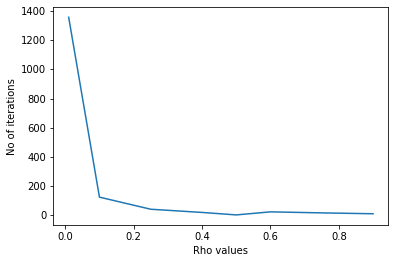

In [22]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(rho, iter6)
plt.ylabel('No of iterations')
plt.xlabel('Rho values')
plt.show()

Answer 3) Minimizer is [8, -12] and minimum function value is 0.

Answer 4) Both the gradient descent procedures (using backtracking and using exact line search) have the same number of iterations. This happens because the minimum function value (0) is reached in 1 iteration only in both.  

Answer 5) As value of alpha increases, the number of iterations generally decreases (with the exception being alpha=0.5 which takes only one iteration). Minimizer is [8, -12] for all values of alpha. As alpha increases, minimum function value generally decreases (with exceptions being alpha=0.6 and alpha=0.9) but remains close to zero. Gradient descent using exact line search takes only one iteration to execute as opposed to backtracking algorithm which uses more iterations ranging from 1 to 1358.

Answer 6) As value of rho increases, the number of iterations generally decreases (with the exception being rho=0.5 which takes only one iteration). Minimizer is [8, -12] for all values of rho. As rho increases, minimum function value generally decreases (with exceptions being rho=0.6 and rho=0.75) but remains close to zero. Gradient descent using exact line search takes only one iteration to execute as opposed to backtracking algorithm which uses more iterations ranging from 1 to 1358.